In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
import matplotlib.pyplot as plt

## UTILS.py  

In [3]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, 
        train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()


### MODEL SELECTION 

In [22]:
num_trainings=20

In [23]:
### Logistic Regression
estimator = LogisticRegression()

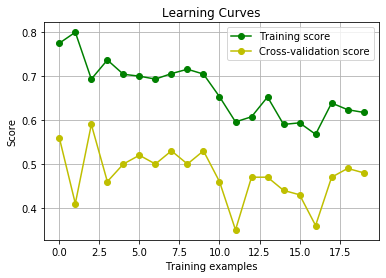

In [24]:
draw_learning_curves(X2,y2,estimator,num_trainings=num_trainings)

In [25]:

### Decision Tree
estimator = GradientBoostingClassifier()

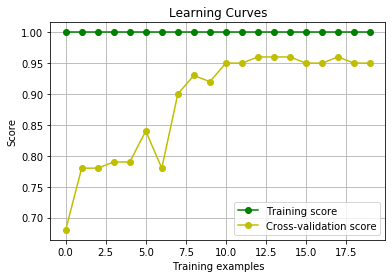

In [26]:
draw_learning_curves(X2,y2,estimator,num_trainings=num_trainings)

In [27]:
### Support Vector Machine
estimator = SVC(kernel='rbf', gamma=1000)

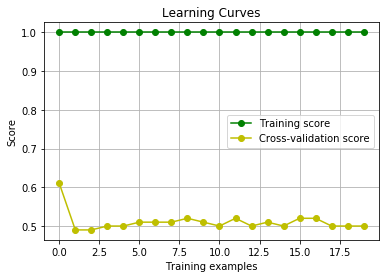

In [28]:
draw_learning_curves(X2,y2,estimator,num_trainings=num_trainings)

#####
We can observe from the curves that:
The Logistic Regression model has a low training and testing score.
The Decision Tree model has a high training and testing score.
The Support Vector Machine model has a high training score, and a low testing score.
